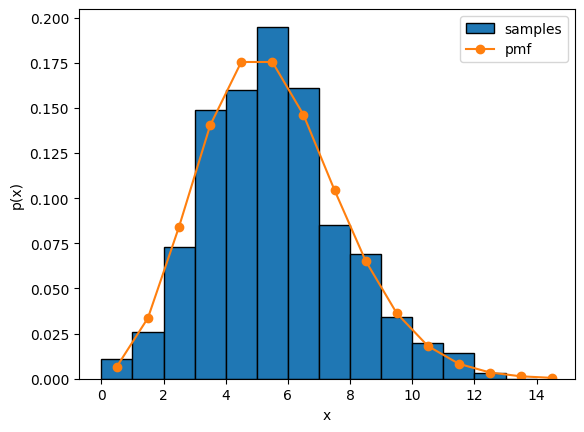

In [8]:
import torch
from torch.distributions import Poisson
import matplotlib.pyplot as plt

# Construct a Poisson distribution with rate 5.0 and draw 1000 samples
rate = 5.0
pois = Poisson(rate)
xs = pois.sample(sample_shape=(1000,))

# Plot a histogram of the samples and overlay the pmf
bins = torch.arange(15)
plt.hist(xs, bins, density=True, edgecolor='k', label='samples')
plt.plot(bins + .5, torch.exp(pois.log_prob(bins)), '-o', label='pmf')
plt.xlabel("x")
plt.ylabel("p(x)")
_ = plt.legend()

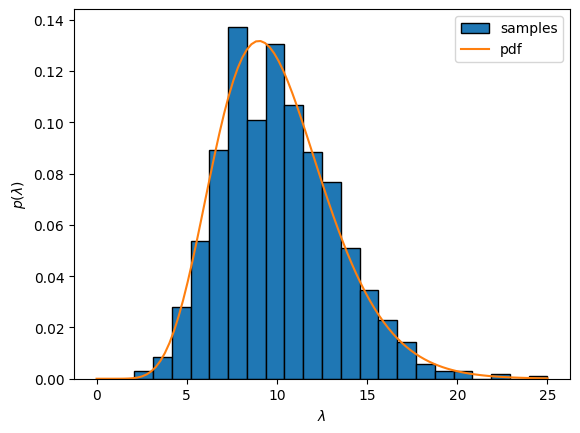

In [7]:
import torch
from torch.distributions import Gamma
import matplotlib.pyplot as plt

# Construct a gamma distribution 
alpha = 10.0
beta = 10.0/10.0
gam = Gamma(alpha, beta)
lambdas = gam.sample(sample_shape=(1000,))

# Plot a histogram of the samples and overlay the pmf
grid = torch.linspace(0, 25, 100)
bins = torch.linspace(0, 25, 25)
plt.hist(lambdas, bins, density=True, edgecolor='k', label='samples')
plt.plot(grid, torch.exp(gam.log_prob(grid)), '-', label='pdf')
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$p(\lambda)$")
_ = plt.legend()

In [9]:
alpha_post = alpha + xs.sum()
beta_post = beta + len(xs)

lambda_mle = xs.sum() / len(xs)
lambda_map = (alpha_post - 1) / beta_post

print("MLE:", lambda_mle)
print("MAP:", lambda_map)

MLE: tensor(5.0430)
MAP: tensor(5.0470)


tensor([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

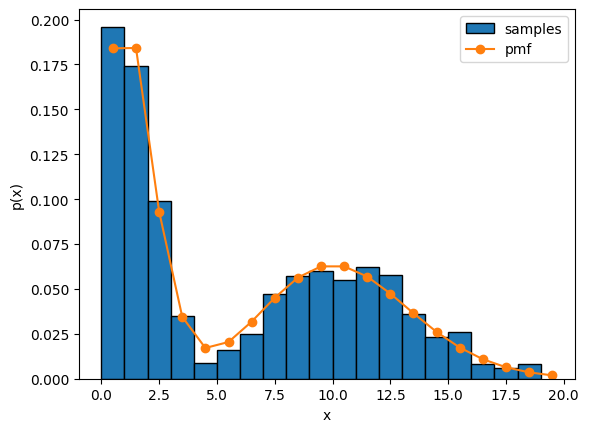

In [16]:
import torch
from torch.distributions import Poisson, Categorical
import matplotlib.pyplot as plt

# Construct a Poisson mixture model with down rate 1.0 and up rate 10.0
rates = torch.asarray([1.0, 10.0])
cat = Categorical(torch.asarray([0.5, 0.5]))
T = 1000

# Sample the states from the categorical distribution
zs = cat.sample(sample_shape=(T,))
print(zs)

# Sample the spike counts from a Poisson distribution 
# using the rate for the corresponding state.
# Note: this uses PyTorch's broadcasting semantics.
xs = Poisson(rates[zs]).sample()
print(xs.shape)

# Compute the mixture probability at a range of bins
bins = torch.arange(20) 
up_pmf = torch.exp(Poisson(rates[1]).log_prob(bins))
down_pmf = torch.exp(Poisson(rates[0]).log_prob(bins))
mixture_pmf = 0.5 * (up_pmf + down_pmf)

# Plot a histogram of the samples and overlay the pmf
plt.hist(xs, bins, density=True, edgecolor='k', label='samples')
plt.plot(bins + 0.5, mixture_pmf, '-o', label='pmf')
plt.xlabel("x")
plt.ylabel("p(x)")
_ = plt.legend()

In [26]:
xs

up_pmf = torch.exp(Poisson(rates[1]).log_prob(bins))
down_pmf = torch.exp(Poisson(rates[0]).log_prob(bins))

up_pmf = torch.exp(Poisson(rates[1]).log_prob(xs))
down_pmf = torch.exp(Poisson(rates[0]).log_prob(xs))

up_pmf
down_pmf
rates[0]

tensor(1.)

In [25]:
alpha_prime_1=alpha+xs[up_pmf<down_pmf].sum()
alpha_prime_1
beta_prime_1=beta+len(xs[up_pmf<down_pmf])
lambda_map_1=(alpha_prime_1-1)/beta_prime_1
lambda_map_1

tensor(0.9624)

In [ ]:
def coordinate_ascent(xs, num_iters=100):
    alpha=10.0
    beta=1
    for i in range(num_iters):
        # E-step: compute the posterior distribution over states
        up_pmf = torch.exp(Poisson(10.0).log_prob(xs))
        down_pmf = torch.exp(Poisson(1.0).log_prob(xs))
        zs = (up_pmf > down_pmf).float()

        # M-step: update the hyperparameters
        alpha_prime_1 = alpha + xs[zs == 1].sum()
        beta_prime_1 = beta + len(xs[zs == 1])
        alpha = alpha_prime
        beta = beta_prime

    return alpha_0, beta_0, alpha_1, beta_1

In [28]:
 up_pmf = torch.exp(Poisson(rates[0]).log_prob(xs))